# Visual Exploratory Analysis

In [51]:
import numpy as np # linear algebra
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.graph_objs as go
from plotly.offline import iplot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [52]:
# Read data and assign NA to missing values 
crimedata= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                   sep='\s*,\s*',encoding='latin-1',engine='python', na_values=["?"])

crimedata.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
           'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
           'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
           'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
           'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
           'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
           'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
           'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
           'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
           'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
           'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
           'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
           'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
           'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
           'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
           'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
           'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
           'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
           'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
           'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

In [53]:
# Drop spatial variables
geodata = pd.DataFrame()
geodata = crimedata[['countyCode', 'communityCode', 'communityname', 'state']].copy()
crimedata = crimedata.drop(columns=['countyCode', 'communityCode', 'communityname', 'state'])

# Drop other predictor variables from features
crimedata = crimedata.drop(columns=['murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
    'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
    'arsonsPerPop','nonViolPerPop'])

# Remove columns with more than 25% of data missing values
variables_na = []
for i in crimedata:
    if crimedata[i].isnull().sum() > 1107: #find the columns with large amounts of na values
        str(i)
        variables_na.append(i)
crimedata = crimedata.drop(columns=variables_na) #delete those

# For other NA values, impute the missing values using SimpleImputer in sklearn.impute
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(crimedata)
crimedata = pd.DataFrame(data=imp.transform(crimedata), columns=crimedata.columns)

In [54]:
crimedata.shape

(2214, 104)

In [55]:
crimedata.describe()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,2214.000000,2.214000e+03,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2214.000000,2214.000000,2214.000000,2214.000000,2214.00000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,5.496387,5.313657e+04,2.707150,9.338699,83.976296,2.668473,7.952918,14.446730,27.647642,13.976518,...,7.338803,61.543162,51.532385,77.410772,88.11140,27.429404,2784.258672,3.038148,0.980605,589.353914
std,2.871984,2.046646e+05,0.334091,14.249369,16.421952,4.474113,14.592557,4.519448,6.181506,5.971745,...,8.420082,16.753020,10.516238,10.880634,7.28945,109.846510,2829.562169,4.912029,2.877702,583.309724
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,0.180000,6.750000,11.830000,27.950000,32.83000,0.900000,10.000000,0.000000,0.000000,0.000000
25%,3.000000,1.437125e+04,2.500000,0.860000,76.310000,0.620000,0.930000,12.250000,24.420000,11.320000,...,2.060000,50.110000,44.992500,72.060000,85.20000,7.300000,1181.850000,0.360000,0.000000,185.532500
50%,5.000000,2.280300e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.545000,...,4.310000,64.500000,52.170000,79.495000,90.03000,13.700000,2029.600000,1.220000,0.000000,445.990000
75%,8.000000,4.304350e+04,2.850000,11.157500,96.227500,2.670000,7.810000,15.360000,29.207500,14.347500,...,9.247500,74.862500,58.727500,85.137500,93.01000,26.100000,3322.250000,3.357500,0.000000,722.010000
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,60.400000,93.140000,78.560000,96.590000,99.90000,3569.800000,44229.900000,54.330000,48.440000,4877.060000


In [56]:
crimedata['ViolentCrimesPerPop'].describe()

count    2214.000000
mean      589.353914
std       583.309724
min         0.000000
25%       185.532500
50%       445.990000
75%       722.010000
max      4877.060000
Name: ViolentCrimesPerPop, dtype: float64

c:\programdata\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\programdata\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



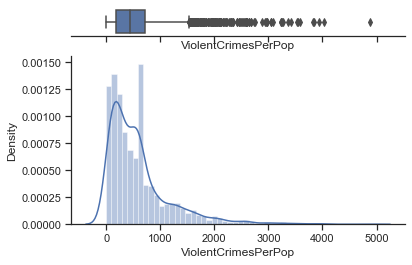

In [57]:
sns.set(style="ticks")

x = crimedata['ViolentCrimesPerPop']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
# plt.savefig('1-ViolentCrimeHist&Box.png')

In [58]:
#skewness and kurtosis
print("Skewness: %f" % crimedata['ViolentCrimesPerPop'].skew())
print("Kurtosis: %f" % crimedata['ViolentCrimesPerPop'].kurt())

Skewness: 2.178009
Kurtosis: 6.546873


Relationship with numerical variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


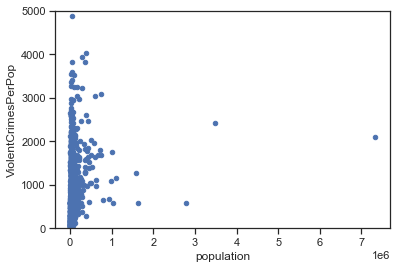

In [59]:
#scatter plot population/ViolentCrimesPerPop
var = 'population'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='ViolentCrimesPerPop', ylim=(0,5000));
# plt.savefig('2-scatterViol&Pop.png')

In [60]:
crimedata['PopDens'].describe()

count     2214.000000
mean      2784.258672
std       2829.562169
min         10.000000
25%       1181.850000
50%       2029.600000
75%       3322.250000
max      44229.900000
Name: PopDens, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


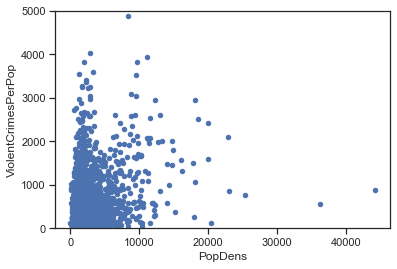

In [61]:
#scatter plot PopDens/ViolentCrimesPerPop
var = 'PopDens'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
data.plot.scatter(x=var, y='ViolentCrimesPerPop', ylim=(0,5000));
# plt.savefig('3-scatterViol&PopDens.png')

Relationship with categorical features

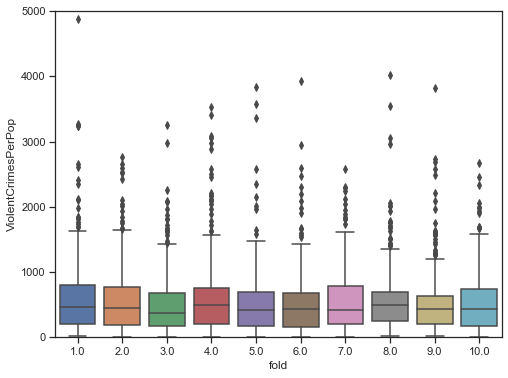

In [62]:
#box plot fold/ViolentCrimesPerPop
var = 'fold'
data = pd.concat([crimedata['ViolentCrimesPerPop'], crimedata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="ViolentCrimesPerPop", data=data)
fig.axis(ymin=0, ymax=5000);
# plt.savefig('5-BoxFold&Viol.png')

Correlation matrix

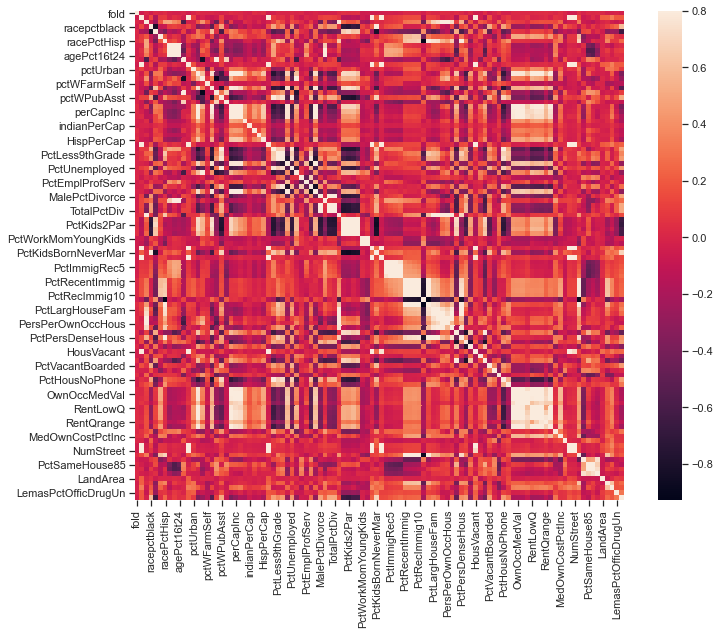

In [63]:
#correlation matrix
corrmat = crimedata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# plt.savefig('6-CorrelationMatrix.png')

ViolentCrimesPerPop correlation matrix

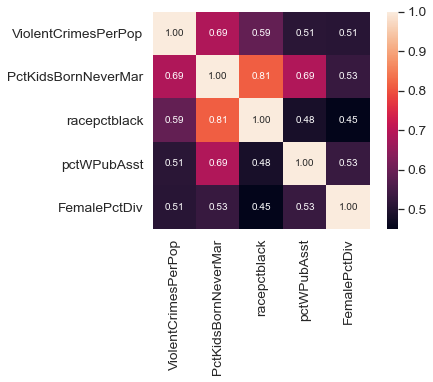

In [64]:
#ViolentCrimesPerPop correlation matrix
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'ViolentCrimesPerPop')['ViolentCrimesPerPop'].index
cm = np.corrcoef(crimedata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
# plt.savefig('7-ViolCorrelationMatrix.png')

Scatter plots between 'ViolentCrimesPerPop' and correlated variables

c:\programdata\anaconda3\envs\geospatial\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



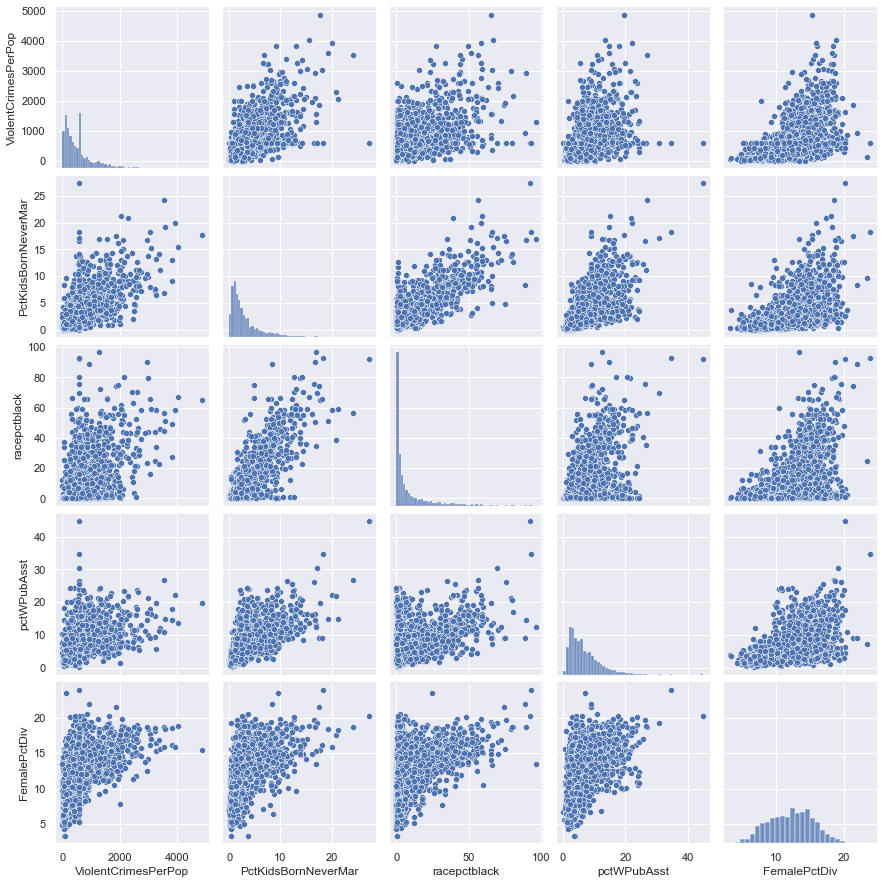

In [65]:
#scatterplot
sns.set()
sns.pairplot(crimedata[cols], size = 2.5)
plt.show();
# plt.savefig('8-scatterplotViol.png')

c:\programdata\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



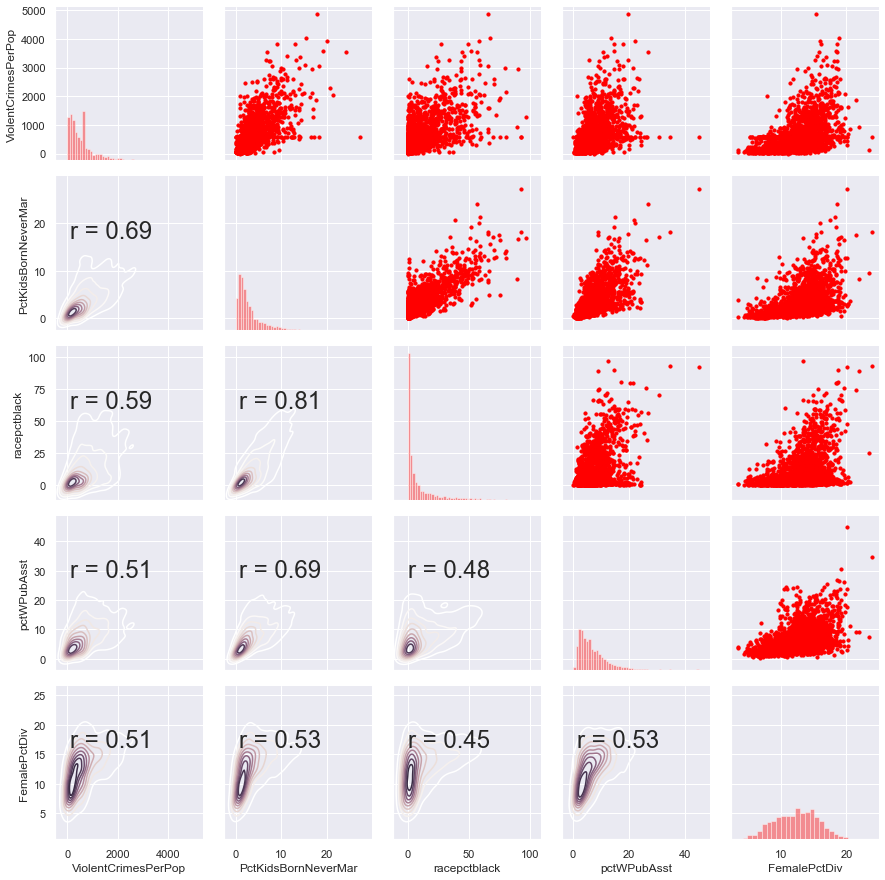

In [66]:
# CORRELATION COEFFICIENTS
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)

cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(crimedata[cols])

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

Univariate analysis

In [67]:
#standardizing data
ViolentCrimesPerPop_scaled = StandardScaler().fit_transform(crimedata['ViolentCrimesPerPop'][:,np.newaxis]);
low_range = ViolentCrimesPerPop_scaled[ViolentCrimesPerPop_scaled[:,0].argsort()][:10]
high_range= ViolentCrimesPerPop_scaled[ViolentCrimesPerPop_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.01059014]
 [-1.00141627]
 [-0.99920425]
 [-0.9975581 ]
 [-0.9972323 ]
 [-0.99546611]
 [-0.99541467]
 [-0.99503743]
 [-0.99474592]
 [-0.99049336]]

outer range (high) of the distribution:
[[4.75936368]
 [4.84451779]
 [5.04378801]
 [5.06057533]
 [5.13415493]
 [5.55551858]
 [5.56390367]
 [5.72496942]
 [5.89397443]
 [7.35231139]]


c:\programdata\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Normality

- Histogram - Kurtosis and skewness.
- Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

c:\programdata\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



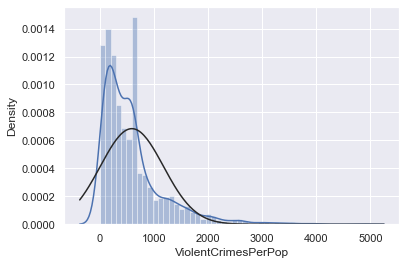

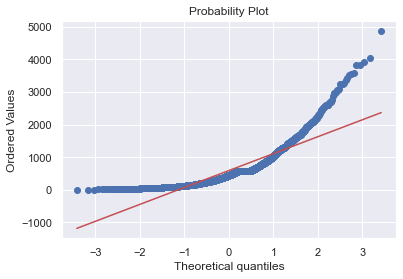

In [68]:
#histogram and normal probability plot
sns.distplot(crimedata['ViolentCrimesPerPop'], fit=norm);
fig = plt.figure()
res = stats.probplot(crimedata['ViolentCrimesPerPop'], plot=plt)
# plt.savefig('10-ViolNorm_1.png')

In [69]:
#applying log transformation
crimedata['ViolentCrimesPerPop'] = np.log(crimedata['ViolentCrimesPerPop'])
crimedata['ViolentCrimesPerPop'].describe()

c:\programdata\anaconda3\envs\geospatial\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

divide by zero encountered in log



count    2214.000000
mean            -inf
std              NaN
min             -inf
25%         5.223230
50%         6.100297
75%         6.582039
max         8.492298
Name: ViolentCrimesPerPop, dtype: float64

In [70]:
# #transformed histogram and normal probability plot
# sns.distplot(crimedata['ViolentCrimesPerPop'], fit=norm)
# fig = plt.figure()
# res = stats.probplot(crimedata['ViolentCrimesPerPop'], plot=plt)
# plt.savefig('11-ViolNorm_2.png')

Homoscedasticity

Text(0, 0.5, 'ViolentCrimesPerPop')

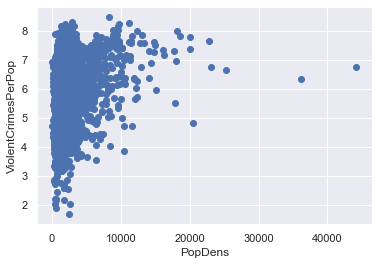

In [71]:
#scatter plot
plt.scatter(crimedata['PopDens'], crimedata['ViolentCrimesPerPop']);
plt.xlabel("PopDens")
plt.ylabel("ViolentCrimesPerPop")
# plt.savefig('12-ViolHomo_1.png')

Plot Map

In [72]:
# Add spatial data back
crimedata['countyCode'] = geodata['countyCode']
crimedata['communityCode'] = geodata['communityCode']
crimedata['communityname'] = geodata['communityname']
crimedata['state'] = geodata['state']

#group Violent crime and nonViolent crime by state
crimedata_state = crimedata.groupby('state').agg({'ViolentCrimesPerPop':'mean'})[['ViolentCrimesPerPop']].reset_index()

In [73]:
##Aggregate view of Violent Crimes by state
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "ylgnbu",
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['ViolentCrimesPerPop'].astype(float),
        colorbar = {'title':'Violent Crimes Per 100K'}
        )
layout2 = dict(
        title = 'Violent Crimes Per 100K Population across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0,0,0)'),
             )

In [74]:
#Plot the map
fig2 = go.Figure(data = [data2],layout = layout2)
iplot(fig2,validate=False)
# plt.savefig('13-Map_1.png')

In [75]:
# ## Check if there is multicollinearity between any of the explanatory variables under study
# cols = ['HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','PctUnemployed','PctEmploy','murdPerPop','rapesPerPop','robbbPerPop','assaultPerPop','ViolentCrimesPerPop','burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']
# crimedata_study = crimedata.filter(cols, axis=1)
# corr_crimedata_study = crimedata_study.corr()
# iv_corr = corr_crimedata_study.iloc[:-10,:-10]
# multicol_limit = 0.3
# iv_corr = (iv_corr[abs(iv_corr) > multicol_limit][iv_corr != 1.0]).unstack().to_dict()
# iv_multicoll_corr = pd.DataFrame(list(set([(tuple(sorted(key)), iv_corr[key]) for key in iv_corr])),
#         columns=['Independent Variables', 'Correlation Coefficient'])
# print (iv_multicoll_corr[iv_multicoll_corr.notnull().all(axis=1)])